In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

file = "Net_generation_for_electric_power_by_year.csv"

# Read our Kickstarter data into pandas
df = pd.read_csv(file)
df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,https://www.eia.gov/electricity/data/browser/#...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Feb 04 2021 20:30:08 GMT-0700 (Mountain St...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Source: U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,Net generation for electric power,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii : all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii : small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii : utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [3]:
energy_df=df.drop([0, 1, 2, 4])

In [4]:
energy_df[['Net generation for electric power', 'Energy Source']] = energy_df['Net generation for electric power'].str.split(':', expand=True)
energy_df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Energy Source
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [5]:
# set row 3 as header, can make row 3 a list and make that a column header somehow
# energy_date_df[['']]
header_row= 0
energy_df.columns= energy_df.iloc[header_row]
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [6]:
# Drop extra and empty rows
energy_df= energy_df.drop([3, 5])
energy_df


3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [7]:
# Rename empty column heading as "Energy_Source"
energy_df.rename(columns = {None: "Energy_Source"}, inplace= True)
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Energy_Source
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [8]:
# Move the Energy_Source column from the end of the dataframe to the far left side
mid = energy_df['Energy_Source']
energy_df.drop(labels=['Energy_Source'], axis = 1, inplace = True)
energy_df.insert(1, 'Energy_Source', mid)
energy_df

3,description,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [9]:
# Rename description column to location 
energy_df.rename(columns = {"description": "Location"}, inplace= True)
energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [10]:
energy_df.Energy_Source.unique()

array([' all fuels (utility-scale)', ' coal', ' petroleum liquids',
       ' petroleum coke', ' natural gas', ' other gases', ' nuclear',
       ' conventional hydroelectric', ' other renewables', ' wind',
       ' all utility-scale solar', ' utility-scale photovoltaic',
       ' utility-scale thermal', ' geothermal', ' biomass',
       ' wood and wood-derived fuels', ' other biomass',
       ' hydro-electric pumped storage', ' other', ' all solar',
       ' small-scale solar photovoltaic', None], dtype=object)

In [11]:
mapper={' all fuels (utility-scale)': 'all',
        ' coal': 'non-renewable', 
        ' petroleum liquids': 'non-renewable',
        ' petroleum coke':'non-renewable', 
        ' natural gas':'non-renewable', 
        ' other gases':'non-renewable',
        ' nuclear':'non-renewable',
        ' conventional hydroelectric':'renewable', 
        ' other renewables':'renewable',
        ' wind':'renewable',
        ' all utility-scale solar':'all', 
        ' utility-scale photovoltaic':'renewable',
        ' utility-scale thermal':'renewable', 
        ' geothermal':'renewable', 
        ' biomass':'renewable',
        ' wood and wood-derived fuels':'non-renewable',
        ' other biomass': 'renewable',
        ' hydro-electric pumped storage':'renewable', 
        ' other':'non-renewable', 
        ' all solar':'all',
        ' small-scale solar photovoltaic':'renewable'}

energy_df['Renewable']=energy_df['Energy_Source'].map(mapper)

energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [12]:
#Removing extra spaces from the Location column strings
energy_df['Location']=energy_df['Location'].str.strip()

In [13]:
#Removing total rows (labeled as all) to avoid counting duplicates
filtered_df=energy_df[energy_df['Renewable']!='all']
filtered_df


3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1549,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-98.A,118,143,172,25,21,27,...,211,216,219,218,187,125,182,189,171,non-renewable
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [14]:
#Removing rows where all of the data is blank.
filtered_df2=filtered_df[((filtered_df['2001']!="--")&(filtered_df['2002']!="--")&
                         (filtered_df['2003']!="--")&(filtered_df['2004']!="--")&
                         (filtered_df['2005']!="--")&(filtered_df['2006']!="--")&
                         (filtered_df['2007']!="--")&(filtered_df['2008']!="--")&
                         (filtered_df['2009']!="--")&(filtered_df['2010']!="--")&
                         (filtered_df['2011']!="--")&(filtered_df['2012']!="--")&
                         (filtered_df['2013']!="--")&(filtered_df['2014']!="--")&
                         (filtered_df['2015']!="--")&(filtered_df['2016']!="--")&
                         (filtered_df['2017']!="--")&(filtered_df['2018']!="--")&
                         (filtered_df['2019']!="--"))]

filtered_df2

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Hawaii,wind,thousand megawatthours,ELEC.GEN.WND-HI-98.A,2,2,2,7,7,80,...,341,378,503,579,613,639,532,602,529,renewable
1544,Hawaii,geothermal,thousand megawatthours,ELEC.GEN.GEO-HI-98.A,207,73,178,213,222,212,...,224,261,275,254,230,260,323,110,0,renewable
1545,Hawaii,biomass,thousand megawatthours,ELEC.GEN.BIO-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable
1547,Hawaii,other biomass,thousand megawatthours,ELEC.GEN.WAS-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable


In [15]:
#breakout the data from the East North Central Region into it's own dataframe
ENC_df=filtered_df2.loc[filtered_df2["Location"]=="East North Central"]
ENC_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
305,East North Central,None,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307,East North Central,coal,thousand megawatthours,ELEC.GEN.COW-ENC-98.A,424791,439095,445150,449108,459078,451510,...,394593,341389,368854,361841,310998,272319,274501,269192,218059,non-renewable
308,East North Central,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-ENC-98.A,2923,1894,2656,1957,1620,927,...,760,606,581,721,541,523,499,525,466,non-renewable
309,East North Central,petroleum coke,thousand megawatthours,ELEC.GEN.PC-ENC-98.A,258,443,366,1816,1654,1643,...,2632,1980,2902,2974,2908,2090,2002,2172,1439,non-renewable
310,East North Central,natural gas,thousand megawatthours,ELEC.GEN.NG-ENC-98.A,20992,30578,20720,22318,31749,25712,...,45414,79181,55362,56666,85612,107853,97032,131169,153887,non-renewable
311,East North Central,other gases,thousand megawatthours,ELEC.GEN.OOG-ENC-98.A,129,171,136,830,563,499,...,386,673,1724,1872,1983,2183,2275,2228,2327,non-renewable
312,East North Central,nuclear,thousand megawatthours,ELEC.GEN.NUC-ENC-98.A,146040,145261,143377,150447,150858,152301,...,155162,155808,153849,154835,154001,157128,156909,157024,158686,non-renewable
313,East North Central,conventional hydroelectric,thousand megawatthours,ELEC.GEN.HYC-ENC-98.A,4658,4966,4037,4617,4046,4258,...,4254,3549,4268,4864,4608,5216,4846,4423,4948,renewable
314,East North Central,other renewables,thousand megawatthours,ELEC.GEN.AOR-ENC-98.A,2894,2799,2995,3083,2972,3384,...,15244,18604,22867,24579,26992,27047,30103,30516,34668,renewable
315,East North Central,wind,thousand megawatthours,ELEC.GEN.WND-ENC-98.A,73,47,118,184,249,373,...,11338,14598,18580,20171,22804,22952,25705,26084,30313,renewable


In [21]:
ENC_df.dropna()

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
307,East North Central,coal,thousand megawatthours,ELEC.GEN.COW-ENC-98.A,424791,439095,445150,449108,459078,451510,...,394593,341389,368854,361841,310998,272319,274501,269192,218059,non-renewable
308,East North Central,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-ENC-98.A,2923,1894,2656,1957,1620,927,...,760,606,581,721,541,523,499,525,466,non-renewable
309,East North Central,petroleum coke,thousand megawatthours,ELEC.GEN.PC-ENC-98.A,258,443,366,1816,1654,1643,...,2632,1980,2902,2974,2908,2090,2002,2172,1439,non-renewable
310,East North Central,natural gas,thousand megawatthours,ELEC.GEN.NG-ENC-98.A,20992,30578,20720,22318,31749,25712,...,45414,79181,55362,56666,85612,107853,97032,131169,153887,non-renewable
311,East North Central,other gases,thousand megawatthours,ELEC.GEN.OOG-ENC-98.A,129,171,136,830,563,499,...,386,673,1724,1872,1983,2183,2275,2228,2327,non-renewable
312,East North Central,nuclear,thousand megawatthours,ELEC.GEN.NUC-ENC-98.A,146040,145261,143377,150447,150858,152301,...,155162,155808,153849,154835,154001,157128,156909,157024,158686,non-renewable
313,East North Central,conventional hydroelectric,thousand megawatthours,ELEC.GEN.HYC-ENC-98.A,4658,4966,4037,4617,4046,4258,...,4254,3549,4268,4864,4608,5216,4846,4423,4948,renewable
314,East North Central,other renewables,thousand megawatthours,ELEC.GEN.AOR-ENC-98.A,2894,2799,2995,3083,2972,3384,...,15244,18604,22867,24579,26992,27047,30103,30516,34668,renewable
315,East North Central,wind,thousand megawatthours,ELEC.GEN.WND-ENC-98.A,73,47,118,184,249,373,...,11338,14598,18580,20171,22804,22952,25705,26084,30313,renewable
320,East North Central,biomass,thousand megawatthours,ELEC.GEN.BIO-ENC-98.A,2821,2753,2877,2899,2723,3012,...,3876,3938,4162,4204,3929,3748,3882,3814,3662,renewable


In [75]:
ENC_df=ENC_df.drop(columns=["source key", "units", "Location"])

In [79]:
ENC_df=ENC_df.set_index(["Energy_Source", "Renewable"])

In [84]:
ENC_df=ENC_df.astype(int)
ENC_df

,3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Energy_Source,Renewable,,,,,,,,,,,,,,,,,,,
coal,non-renewable,424791,439095,445150,449108,459078,451510,456905,456001,412245,425653,394593,341389,368854,361841,310998,272319,274501,269192,218059
petroleum liquids,non-renewable,2923,1894,2656,1957,1620,927,1144,926,732,752,760,606,581,721,541,523,499,525,466
petroleum coke,non-renewable,258,443,366,1816,1654,1643,1541,1719,1486,1595,2632,1980,2902,2974,2908,2090,2002,2172,1439
natural gas,non-renewable,20992,30578,20720,22318,31749,25712,33643,23552,25139,35231,45414,79181,55362,56666,85612,107853,97032,131169,153887
other gases,non-renewable,129,171,136,830,563,499,464,383,219,405,386,673,1724,1872,1983,2183,2275,2228,2327
nuclear,non-renewable,146040,145261,143377,150447,150858,152301,155920,156305,145214,154900,155162,155808,153849,154835,154001,157128,156909,157024,158686
conventional hydroelectric,renewable,4658,4966,4037,4617,4046,4258,3594,3753,3796,4200,4254,3549,4268,4864,4608,5216,4846,4423,4948
other renewables,renewable,2894,2799,2995,3083,2972,3384,3812,6618,8998,12441,15244,18604,22867,24579,26992,27047,30103,30516,34668
wind,renewable,73,47,118,184,249,373,791,3219,5589,8847,11338,14598,18580,20171,22804,22952,25705,26084,30313


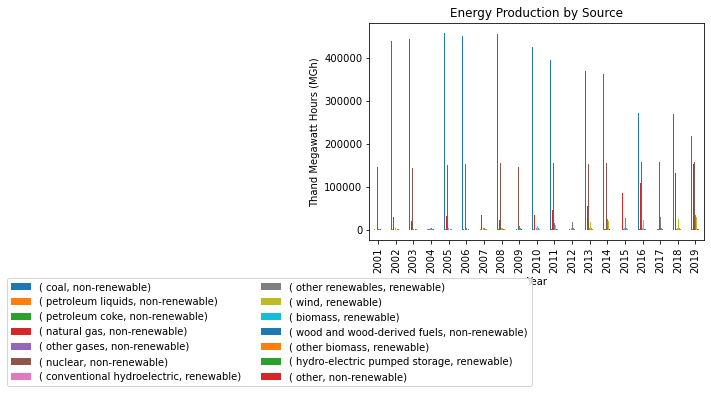

In [95]:
ENC_dfT=ENC_df.T
ENC_dfT.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Thand Megawatt Hours (MGh)")
plt.title("Energy Production by Source")
plt.legend(loc="best", bbox_to_anchor=(0.5, -0.15), ncol= 2)

In [96]:
ENC_dfT.groupby(level="Renewable")

ValueError: level name Renewable is not the name of the index

In [42]:
#temp_df=ENC_df.drop(columns=["source key", "units", "Location", "Energy_Source", "Renewable"])
#temp_df

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
307,424791,439095,445150,449108,459078,451510,456905,456001,412245,425653,394593,341389,368854,361841,310998,272319,274501,269192,218059
308,2923,1894,2656,1957,1620,927,1144,926,732,752,760,606,581,721,541,523,499,525,466
309,258,443,366,1816,1654,1643,1541,1719,1486,1595,2632,1980,2902,2974,2908,2090,2002,2172,1439
310,20992,30578,20720,22318,31749,25712,33643,23552,25139,35231,45414,79181,55362,56666,85612,107853,97032,131169,153887
311,129,171,136,830,563,499,464,383,219,405,386,673,1724,1872,1983,2183,2275,2228,2327
312,146040,145261,143377,150447,150858,152301,155920,156305,145214,154900,155162,155808,153849,154835,154001,157128,156909,157024,158686
313,4658,4966,4037,4617,4046,4258,3594,3753,3796,4200,4254,3549,4268,4864,4608,5216,4846,4423,4948
314,2894,2799,2995,3083,2972,3384,3812,6618,8998,12441,15244,18604,22867,24579,26992,27047,30103,30516,34668
315,73,47,118,184,249,373,791,3219,5589,8847,11338,14598,18580,20171,22804,22952,25705,26084,30313
320,2821,2753,2877,2899,2723,3012,3021,3399,3409,3567,3876,3938,4162,4204,3929,3748,3882,3814,3662


In [43]:
#temp_df=temp_df.rename_axis(None, axis=1)


In [44]:
#temp_df.reset_index(drop=True)

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,424791,439095,445150,449108,459078,451510,456905,456001,412245,425653,394593,341389,368854,361841,310998,272319,274501,269192,218059
1,2923,1894,2656,1957,1620,927,1144,926,732,752,760,606,581,721,541,523,499,525,466
2,258,443,366,1816,1654,1643,1541,1719,1486,1595,2632,1980,2902,2974,2908,2090,2002,2172,1439
3,20992,30578,20720,22318,31749,25712,33643,23552,25139,35231,45414,79181,55362,56666,85612,107853,97032,131169,153887
4,129,171,136,830,563,499,464,383,219,405,386,673,1724,1872,1983,2183,2275,2228,2327
5,146040,145261,143377,150447,150858,152301,155920,156305,145214,154900,155162,155808,153849,154835,154001,157128,156909,157024,158686
6,4658,4966,4037,4617,4046,4258,3594,3753,3796,4200,4254,3549,4268,4864,4608,5216,4846,4423,4948
7,2894,2799,2995,3083,2972,3384,3812,6618,8998,12441,15244,18604,22867,24579,26992,27047,30103,30516,34668
8,73,47,118,184,249,373,791,3219,5589,8847,11338,14598,18580,20171,22804,22952,25705,26084,30313
9,2821,2753,2877,2899,2723,3012,3021,3399,3409,3567,3876,3938,4162,4204,3929,3748,3882,3814,3662


In [47]:
#temp_df=temp_df.astype(int)

In [51]:
#temp_df.dtypes

In [50]:
ENC_delt=temp_df.diff(axis=1)

In [54]:
ENC_delt["Energy Source"]=ENC_df["Energy_Source"]
ENC_delt

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Energy Source
307,NaN,14304.0,6055.0,3958.0,9970.0,-7568.0,5395.0,-904.0,-43756.0,13408.0,-31060.0,-53204.0,27465.0,-7013.0,-50843.0,-38679.0,2182.0,-5309.0,-51133.0,coal
308,NaN,-1029.0,762.0,-699.0,-337.0,-693.0,217.0,-218.0,-194.0,20.0,8.0,-154.0,-25.0,140.0,-180.0,-18.0,-24.0,26.0,-59.0,petroleum liquids
309,NaN,185.0,-77.0,1450.0,-162.0,-11.0,-102.0,178.0,-233.0,109.0,1037.0,-652.0,922.0,72.0,-66.0,-818.0,-88.0,170.0,-733.0,petroleum coke
310,NaN,9586.0,-9858.0,1598.0,9431.0,-6037.0,7931.0,-10091.0,1587.0,10092.0,10183.0,33767.0,-23819.0,1304.0,28946.0,22241.0,-10821.0,34137.0,22718.0,natural gas
311,NaN,42.0,-35.0,694.0,-267.0,-64.0,-35.0,-81.0,-164.0,186.0,-19.0,287.0,1051.0,148.0,111.0,200.0,92.0,-47.0,99.0,other gases
312,NaN,-779.0,-1884.0,7070.0,411.0,1443.0,3619.0,385.0,-11091.0,9686.0,262.0,646.0,-1959.0,986.0,-834.0,3127.0,-219.0,115.0,1662.0,nuclear
313,NaN,308.0,-929.0,580.0,-571.0,212.0,-664.0,159.0,43.0,404.0,54.0,-705.0,719.0,596.0,-256.0,608.0,-370.0,-423.0,525.0,conventional hydroelectric
314,NaN,-95.0,196.0,88.0,-111.0,412.0,428.0,2806.0,2380.0,3443.0,2803.0,3360.0,4263.0,1712.0,2413.0,55.0,3056.0,413.0,4152.0,other renewables
315,NaN,-26.0,71.0,66.0,65.0,124.0,418.0,2428.0,2370.0,3258.0,2491.0,3260.0,3982.0,1591.0,2633.0,148.0,2753.0,379.0,4229.0,wind
320,NaN,-68.0,124.0,22.0,-176.0,289.0,9.0,378.0,10.0,158.0,309.0,62.0,224.0,42.0,-275.0,-181.0,134.0,-68.0,-152.0,biomass


In [70]:
ENC_delt=ENC_delt.set_index("Energy Source")

In [71]:
ENC_delta=ENC_delt.T

In [72]:
ENC_delta

Energy Source,coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,14304.0,-1029.0,185.0,9586.0,42.0,-779.0,308.0,-95.0,-26.0,-68.0,-101.0,32.0,91.0,319.0
2003,6055.0,762.0,-77.0,-9858.0,-35.0,-1884.0,-929.0,196.0,71.0,124.0,66.0,59.0,19.0,-183.0
2004,3958.0,-699.0,1450.0,1598.0,694.0,7070.0,580.0,88.0,66.0,22.0,120.0,-98.0,-96.0,-98.0
2005,9970.0,-337.0,-162.0,9431.0,-267.0,411.0,-571.0,-111.0,65.0,-176.0,0.0,-176.0,7.0,-86.0
2006,-7568.0,-693.0,-11.0,-6037.0,-64.0,1443.0,212.0,412.0,124.0,289.0,19.0,270.0,67.0,-32.0
2007,5395.0,217.0,-102.0,7931.0,-35.0,3619.0,-664.0,428.0,418.0,9.0,-30.0,40.0,-90.0,-13.0
2008,-904.0,-218.0,178.0,-10091.0,-81.0,385.0,159.0,2806.0,2428.0,378.0,-1.0,378.0,213.0,9.0
2009,-43756.0,-194.0,-233.0,1587.0,-164.0,-11091.0,43.0,2380.0,2370.0,10.0,-127.0,137.0,59.0,-8.0
2010,13408.0,20.0,109.0,10092.0,186.0,9686.0,404.0,3443.0,3258.0,158.0,175.0,-17.0,-166.0,-21.0


<AxesSubplot:>

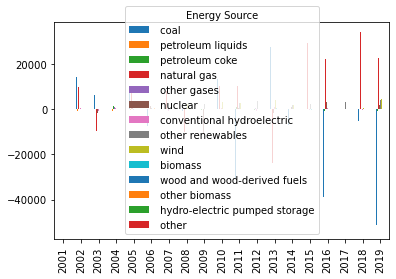

In [74]:
ENC_delta.plot(kind="bar")

In [63]:
#ENCcolumns=ENC_delt.columns
#ENCcolumns.values

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', 'Energy Source'], dtype=object)

In [ ]:
ENC2001

In [66]:
ENC_delt.plot(kind="bar", x=ENC_delt["2001"], y=ENC_delt["Energy Source"])

KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              nan],\n             dtype='float64')] are in the [columns]"

In [17]:
ENC_df.diff(axis=1) #create a new dataframe for delta

TypeError: unsupported operand type(s) for -: 'NoneType' and 'str'